In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import tree, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [31]:
train_data = pd.read_csv('kaggle_train.csv')
bot_data = pd.read_csv('bots_data.csv')
nonbot_data = pd.read_csv('nonbots_data.csv')
test_data = pd.read_csv('test.csv')


In [32]:
train_data.columns

Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listedcount', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot'],
      dtype='object')

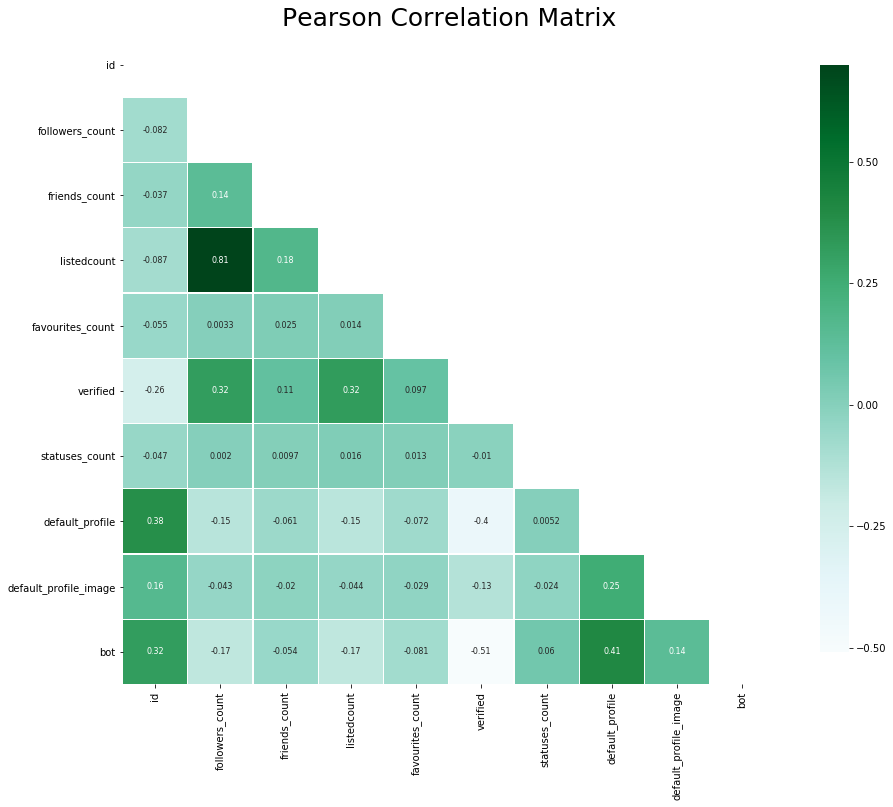

In [33]:
features = ['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listedcount', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot']

mask = np.zeros_like(train_data[features].corr(), dtype = np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(train_data[features].corr(),linewidths = 0.25,vmax = 0.7,square = True,cmap = "BuGn", 
            linecolor = 'w',annot = True,annot_kws = {"size":8},mask = mask,cbar_kws = {"shrink": 0.9})

In [34]:
train_attr = train_data[
  ['followers_count', 'friends_count', 'listedcount', 'favourites_count', 'statuses_count', 'verified']]
train_label = train_data[['bot']]

bot_attr = bot_data[
  ['followers_count', 'friends_count', 'listedcount', 'favourites_count', 'statuses_count', 'verified']]
bot_label = bot_data[['bot']]

nonbot_attr = nonbot_data[
  ['followers_count', 'friends_count', 'listedcount', 'favourites_count', 'statuses_count', 'verified']]
nonbot_label = nonbot_data[['bot']]

test_attr = test_data[
  ['followers_count', 'friends_count', 'listed_count', 'favourites_count', 'statuses_count', 'verified']]
test_label = test_data[['bot']]

# Decision Tree

In [35]:
clf = tree.DecisionTreeClassifier()

X = train_attr.as_matrix()
Y = train_label.as_matrix()
clf = clf.fit(X, Y)

C:\Users\ruchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ruchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


# Logistic Regression

In [36]:
clf = LogisticRegression().fit(train_attr, train_label.as_matrix())

C:\Users\ruchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\ruchi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Naive Bayes

In [28]:
clf = GaussianNB().fit(train_attr, train_label.as_matrix())

C:\Users\ruchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\ruchi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Common Code

In [38]:
actual = np.array(test_label)
predicted = clf.predict(test_attr)
pred = np.array(predicted)

In [39]:
accuracy = accuracy_score(actual, pred) * 100
precision = precision_score(actual, pred) * 100
recall = recall_score(actual, pred) * 100
f1 = f1_score(actual, pred)

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Accuracy: 80.0
Precision: 94.11764705882352
Recall: 64.0
F1 Score: 0.7619047619047621


Testing on bot data

In [11]:
actual = np.array(bot_label)
predicted = clf.predict(bot_attr)
pred = np.array(predicted)

In [12]:
accuracy = accuracy_score(actual, pred) * 100
precision = precision_score(actual, pred) * 100
recall = recall_score(actual, pred) * 100
f1 = f1_score(actual, pred)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Accuracy: 98.67424242424242
Precision: 100.0
Recall: 98.67424242424242
F1 Score: 0.9933269780743564


Testing on non bot data

In [13]:
actual = np.array(nonbot_label)
predicted = clf.predict(nonbot_attr)
pred = np.array(predicted)

In [14]:
accuracy = accuracy_score(actual, pred) * 100
print("Accuracy:",accuracy)

Accuracy: 28.57142857142857


# Cross Validation

In [15]:
train_X, test_X, train_Y, test_Y = train_test_split(train_attr, train_label, test_size=0.4, random_state=0)

X = train_X.as_matrix()
Y = train_Y.as_matrix()
clf = clf.fit(X, Y)

actual = np.array(test_Y)
predicted = clf.predict(test_X)
pred = np.array(predicted)

accuracy = accuracy_score(actual, pred) * 100
precision = precision_score(actual, pred) * 100
recall = recall_score(actual, pred) * 100
f1 = f1_score(actual, pred)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Accuracy: 62.019660411081325
Precision: 56.308654848800835
Recall: 98.9010989010989
F1 Score: 0.717607973421927


C:\Users\ruchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ruchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\ruchi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# KFold

In [16]:
kf = KFold(n_splits=4)

X = train_attr.as_matrix()
Y = train_label.as_matrix()

i = 0
for train_indices, test_indices in kf.split(X):
    i += 1
    train_X = X[train_indices, :]
    train_Y = Y[train_indices]
    test_X = X[test_indices, :]
    test_Y = Y[test_indices]
    clf = clf.fit(train_X, train_Y)
    pred = clf.predict(test_X)
    
    accuracy = accuracy_score(test_Y, pred) * 100
    precision = precision_score(test_Y, pred) * 100
    recall = recall_score(test_Y, pred) * 100
    print("Split no:",i)
    print("Accuracy:",accuracy)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F1 Score:",f1)

Split no: 1
Accuracy: 97.85714285714285
Precision: 100.0
Recall: 97.85714285714285
F1 Score: 0.717607973421927
Split no: 2
Accuracy: 91.41630901287554
Precision: 91.92825112107623
Recall: 99.03381642512076
F1 Score: 0.717607973421927
Split no: 3
Accuracy: 29.89985693848355
Precision: 0.0
Recall: 0.0
F1 Score: 0.717607973421927
Split no: 4
Accuracy: 26.32331902718169
Precision: 0.0
Recall: 0.0
F1 Score: 0.717607973421927


C:\Users\ruchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ruchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\ruchi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ruchi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ruchi\Anaconda3\lib\s

# Results on unkown dataset

In [17]:
X = train_attr.as_matrix()
Y = train_label.as_matrix()
clf = clf.fit(X, Y)

C:\Users\ruchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\ruchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\ruchi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
test_data = pd.read_csv('kaggle_test.csv')
test_attr = test_data[
  ['followers_count', 'friends_count', 'listed_count', 'favorites_count', 'statuses_count', 'verified']]
test_attr.replace('None', np.NaN, inplace=True)
test_attr['followers_count'] = test_attr['followers_count'].astype(np.float64)
test_attr['friends_count'] = test_attr['friends_count'].astype(np.float64)
test_attr['listed_count'] = test_attr['listed_count'].astype(np.float64)
test_attr['favorites_count'] = test_attr['favorites_count'].astype(np.float64)
test_attr['statuses_count'] = test_attr['statuses_count'].astype(np.float64)
test_attr['verified'] = np.where(test_attr['verified'] == 'TRUE', True, False)

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
test_attr = imp.fit_transform(test_attr)

pred = clf.predict(test_attr)
np.savetxt("output.csv", pred, fmt="%i", header="bot", delimiter=",")

C:\Users\ruchi\Anaconda3\lib\site-packages\pandas\core\frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
C:\Users\ruchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ruchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ruc

In [19]:
train_data = pd.read_csv('kaggle_train.csv')
train_label = train_data[['bot']]
test_data = pd.read_csv('test.csv')
test_label = test_data[['bot']]

In [20]:
train_X, test_X, train_Y, test_Y = train_test_split(train_data, train_label, test_size=0.4, random_state=0)

X = train_X[['followers_count', 'friends_count', 'listedcount', 'favourites_count', 'statuses_count', 'verified']].as_matrix()
Y = train_Y.as_matrix()
clf = tree.DecisionTreeClassifier()

clf = clf.fit(X, Y)

Z = test_X[['followers_count', 'friends_count', 'listedcount', 'favourites_count', 'statuses_count', 'verified']].as_matrix()
actual = np.array(test_Y)
predicted = clf.predict(Z)
pred = np.array(predicted)

C:\Users\ruchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ruchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\ruchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [21]:
sc = test_X['screen_name'].as_matrix()
i = 0
for name in sc:
    if 'bot' in name or 'Bot' in name or 'bOt' in name or 'boT' in name or 'BOT' in name or 'BOt' in name or 'BoT' in name or 'bOT' in name:
        pred[i] = 1
    i += 1

np.savetxt("improvedoutput.csv", pred, fmt="%i", header="bot", delimiter=",")

C:\Users\ruchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
